In [48]:
from statsmodels.stats.diagnostic import lilliefors
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

In [49]:
# Carga CSVs en DataFrames
goals = pd.read_csv("../../data/to_np_csv/GOALS.csv")['0']
alegria = pd.read_csv("../../data/to_np_csv/ALEGRIA.csv")['1']
roullette= pd.read_csv("../../data/to_np_csv/ROULLETTE.csv")['2']
oil_barrel = pd.read_csv("../../data/to_np_csv/OIL_BARREL.csv")['3']

In [50]:
sns.set(style="whitegrid")

In [51]:
summary = pd.DataFrame(columns=pd.MultiIndex.from_tuples([
    ('KS-lognormal', 'Statistic'), 
    ('KS-lognormal', 'P-value'), 
    ('KS-gamma', 'Statistic'), 
    ('KS-gamma', 'P-value'),
    ('Shapiro-Wilk', 'Statistic'), 
    ('Shapiro-Wilk', 'P-value'), 
    ('Lilliefors', 'Statistic'), 
    ('Lilliefors', 'P-value'),
]))

summary

Empty DataFrame
Columns: [(KS-lognormal, Statistic), (KS-lognormal, P-value), (KS-gamma, Statistic), (KS-gamma, P-value), (Shapiro-Wilk, Statistic), (Shapiro-Wilk, P-value), (Lilliefors, Statistic), (Lilliefors, P-value)]
Index: []

## How many goals were scored in the 2010 FIFA World Cup?

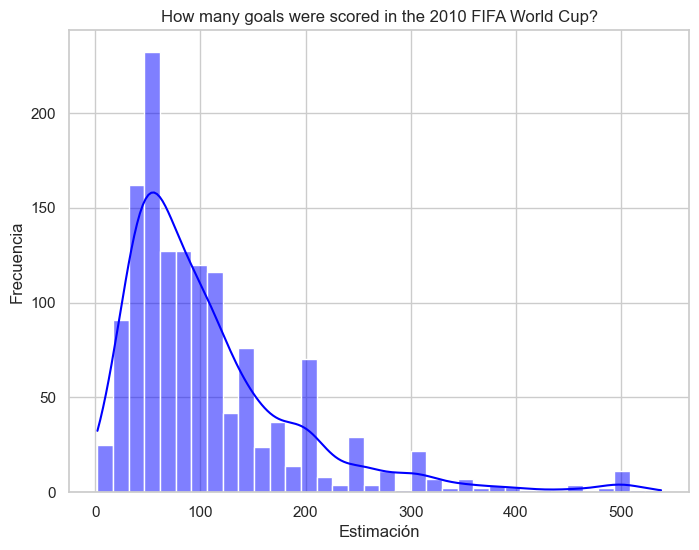

Mean: 107.94164265129683
Standard Deviation: 85.84989695786686


In [52]:
plt.figure(figsize=(8, 6))
sns.histplot(goals, kde=True, color='blue')
plt.title('How many goals were scored in the 2010 FIFA World Cup?')
plt.xlabel('Estimación')
plt.ylabel('Frecuencia')
plt.show()

mean = np.mean(goals)
std = np.std(goals)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

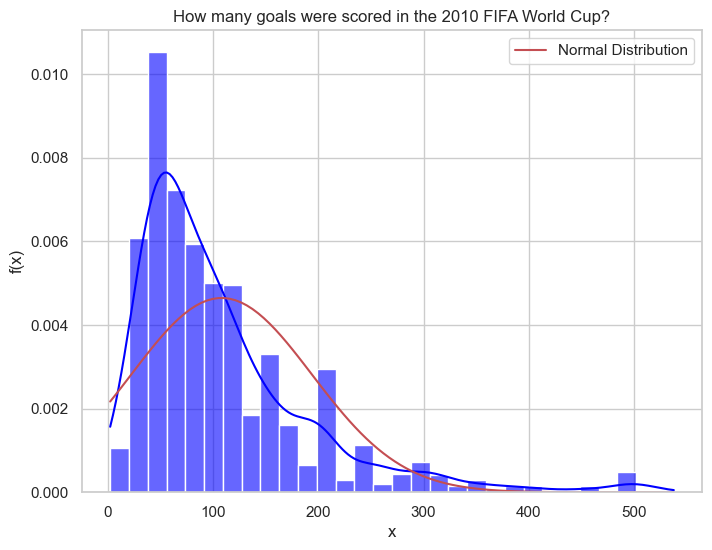

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(goals, kde=True, stat='density', bins=30, color='blue', alpha=0.6)

mean, std = np.mean(goals), np.std(goals)

# Superposición de curva normal
x = np.linspace(min(goals), max(goals), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')

plt.title('How many goals were scored in the 2010 FIFA World Cup?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

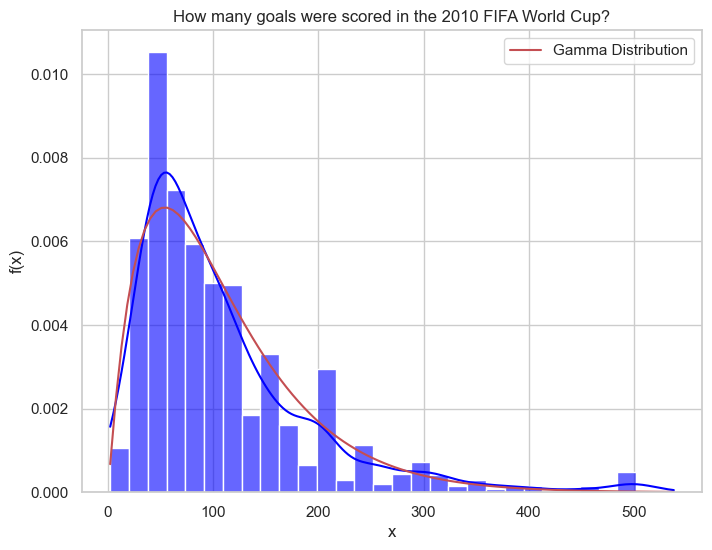

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(goals, kde=True, stat='density', bins=30, color='blue', alpha=0.6)

# Estimación de la distribución gamma
shape, loc, scale = stats.gamma.fit(goals, floc=0)

# Superposición de curva normal
x = np.linspace(min(goals), max(goals), 100)
pdf_gamma = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_gamma, 'r-', label='Gamma Distribution')

plt.title('How many goals were scored in the 2010 FIFA World Cup?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/goals_distribution_gamma.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

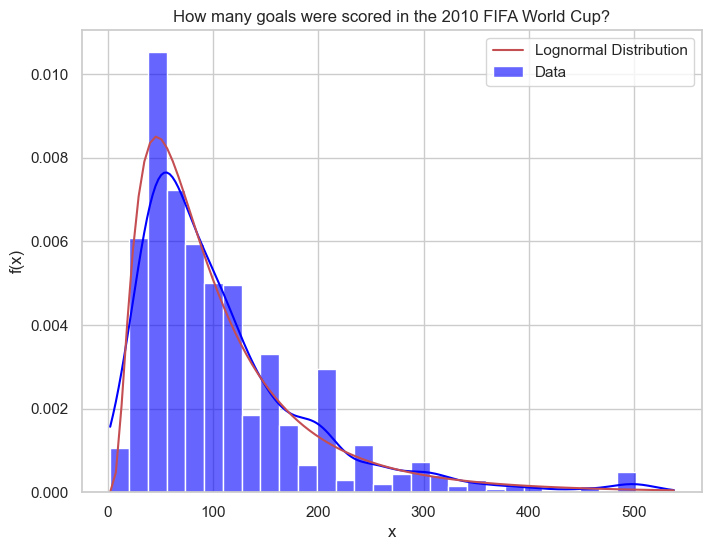

In [55]:
plt.figure(figsize=(8, 6))
sns.histplot(goals, kde=True, stat='density', bins=30, color='blue', alpha=0.6 , label='Data')

# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(goals, floc=0)

# Superposición de curva lognormal
x = np.linspace(min(goals), max(goals), 100)
pdf_lognormal = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognormal, 'r-', label='Lognormal Distribution')

plt.title('How many goals were scored in the 2010 FIFA World Cup?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/goals_distribution_log.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Kolmogorov-Smirnov (log-normal)

In [56]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(goals, floc=0)

# Ejecución test Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(goals, 'lognorm', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Prueba de hipótesis
alpha = 0.05
if ks_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_p_value * 0.02
min_alpha = ks_p_value + eps
print(f"Minimum value of alpha: {min_alpha}")

summary.loc['GOALS', ('KS-lognormal', 'Statistic')] = ks_stat
summary.loc['GOALS', ('KS-lognormal', 'P-value')] = ks_p_value

Kolmogorov-Smirnov Test Statistic: 0.041310736351122986
P-value: 0.017027892363311967
Reject the null hypothesis (H0)
Minimum value of alpha: 0.017368450210578205


#### Test: Kolmogorov-Smirnov (gamma)

In [57]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.gamma.fit(goals, floc=0)

# Ejecución test Kolmogorov-Smirnov
ks_g_stat, ks_g_p_value = stats.kstest(goals, 'gamma', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic (gamma): {ks_g_stat}")
print(f"P-value: {ks_g_p_value}")

# Prueba de hipótesis
alpha = 0.05
if ks_g_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_g_p_value * 0.02
min_alpha = ks_g_p_value + eps
print(f"Minimum value of alpha: {min_alpha}")

summary.loc['GOALS', ('KS-gamma', 'Statistic')] = ks_g_stat
summary.loc['GOALS', ('KS-gamma', 'P-value')] = ks_g_p_value

Kolmogorov-Smirnov Test Statistic (gamma): 0.06859092184018611
P-value: 4.018809912521047e-06
Reject the null hypothesis (H0)
Minimum value of alpha: 4.099186110771468e-06


### Transformación log -> normal

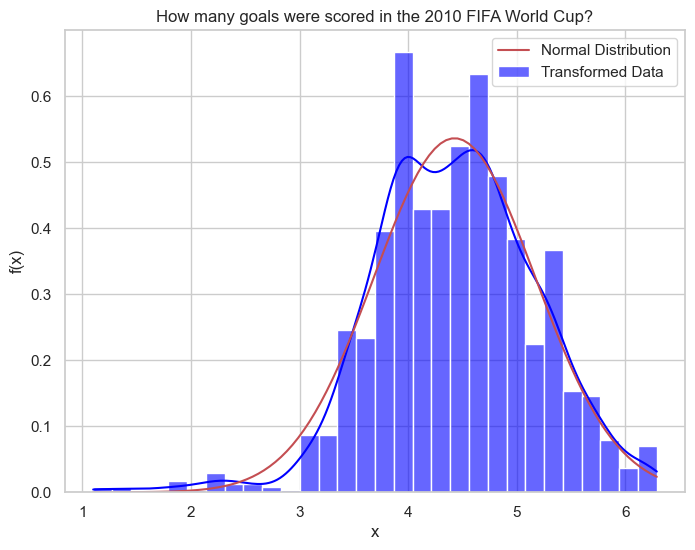

In [58]:
# Aplicar transformación logarítmica
transformed_data = np.log1p(goals)

plt.figure(figsize=(8, 6))
sns.histplot(transformed_data, kde=True, stat='density', bins=30, color='blue', alpha=0.6 , label='Transformed Data')

mean, std = np.mean(transformed_data), np.std(transformed_data)

# Superposición de curva normal
x = np.linspace(min(transformed_data), max(transformed_data), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')

plt.title('How many goals were scored in the 2010 FIFA World Cup?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/goals_distribution_normal.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Shapiro-Wilk (Normal)

In [59]:
shapiro_stat, shapiro_p_value = stats.shapiro(transformed_data)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p_value}")

# Chequeo de hipoótesis
alpha = 0.05
if shapiro_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = shapiro_p_value * 0.02
min_alpha = shapiro_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['GOALS', ('Shapiro-Wilk', 'Statistic')] = shapiro_stat
summary.loc['GOALS', ('Shapiro-Wilk', 'P-value')] = shapiro_p_value

Shapiro-Wilk Test Statistic: 0.9839416146278381
P-value: 2.714046348772925e-11
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000002768327276


#### Test: Lilliefors (Normal)

In [60]:
lilliefors_stat, lilliefors_pvalue = lilliefors(transformed_data)

print(f"Lilliefors Test Statistic: {lilliefors_stat}")
print(f"P-value: {lilliefors_pvalue}")

# Chequeo de hipoótesis
alpha = 0.05
if lilliefors_pvalue > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = lilliefors_pvalue * 0.02
min_alpha = lilliefors_pvalue + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['GOALS', ('Lilliefors', 'Statistic')] = lilliefors_stat
summary.loc['GOALS', ('Lilliefors', 'P-value')] = lilliefors_pvalue

Lilliefors Test Statistic: 0.03994751615886189
P-value: 0.0009999999999998899
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00101999999999988775


In [61]:
summary

KS-lognormal            KS-gamma           Shapiro-Wilk          \
         Statistic   P-value Statistic   P-value    Statistic P-value   
GOALS     0.041311  0.017028  0.068591  0.000004     0.983942     0.0   

      Lilliefors          
       Statistic P-value  
GOALS   0.039948   0.001

## How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?

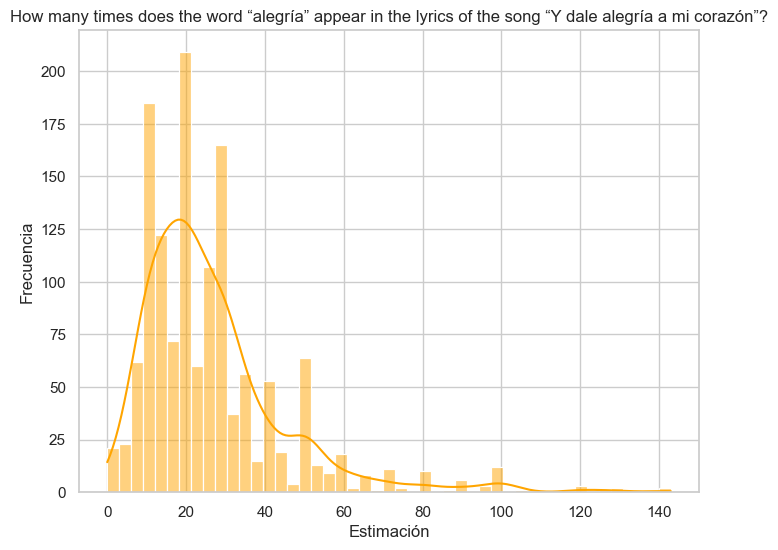

Mean: 26.788252356780276
Standard Deviation: 18.800316478755448


In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(alegria, kde=True, color='orange')
plt.title('How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?')
plt.xlabel('Estimación')
plt.ylabel('Frecuencia')
plt.show()

mean = np.mean(alegria)
std = np.std(alegria)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

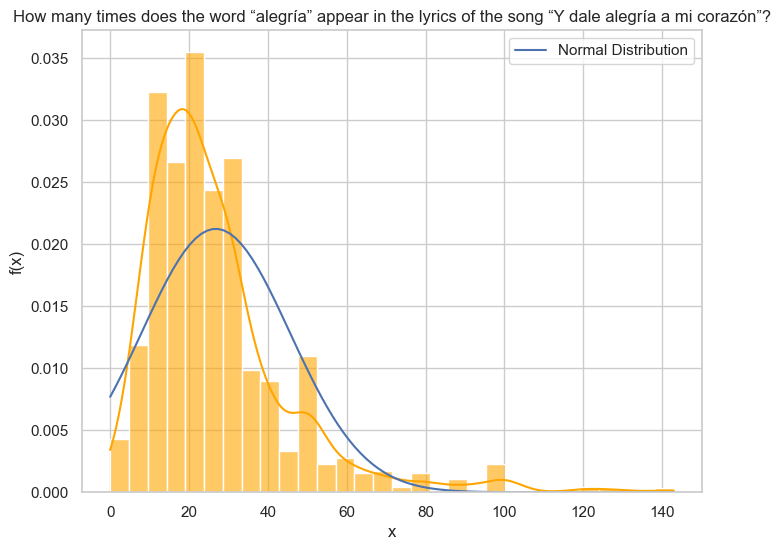

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(alegria, kde=True, stat='density', bins=30, color='orange', alpha=0.6)

mean, std = np.mean(alegria), np.std(alegria)

# Superposición de curva normal
x = np.linspace(min(alegria), max(alegria), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'b-', label='Normal Distribution')

plt.title('How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

In [64]:
ELIMINAR = True

alegria_negative = alegria[alegria <= 0] # 344 y 1207
print(f"Count negative: {len(alegria_negative)}")
print(alegria_negative)

# Solo positivos
if ELIMINAR:
    alegria_positive = alegria[alegria> 0]
else:
    eps = 1e-10
    alegria_positive = alegria + eps

Count negative: 2
337     0
1187    0
Name: 1, dtype: int64


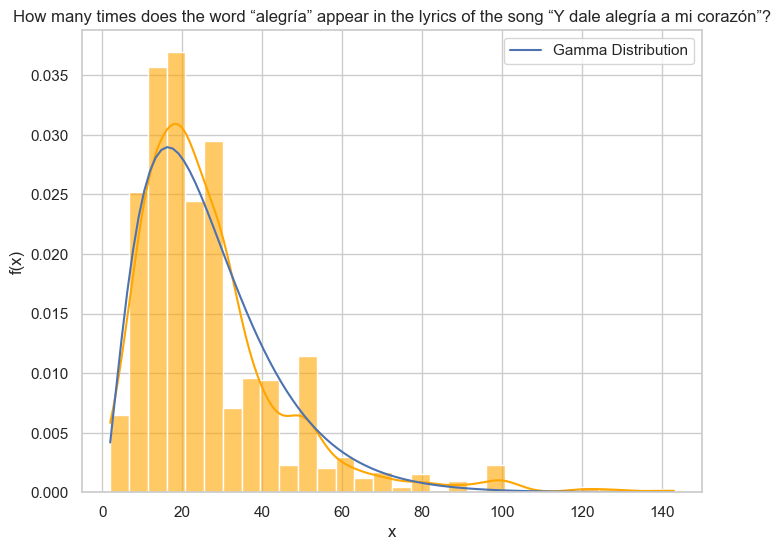

2.578568562077294 0 10.403896521648123


In [65]:
plt.figure(figsize=(8, 6))
sns.histplot(alegria_positive, kde=True, stat='density', bins=30, color='orange', alpha=0.6)

# Estimación de la distribución gamma
shape, loc, scale = stats.gamma.fit(alegria_positive, floc=0)

# Superposición de curva normal
x = np.linspace(min(alegria_positive), max(alegria_positive), 100)
pdf_gamma = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_gamma, 'b-', label='Gamma Distribution')

plt.title('How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/alegria_distribution_gamma.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
print(shape, loc, scale)

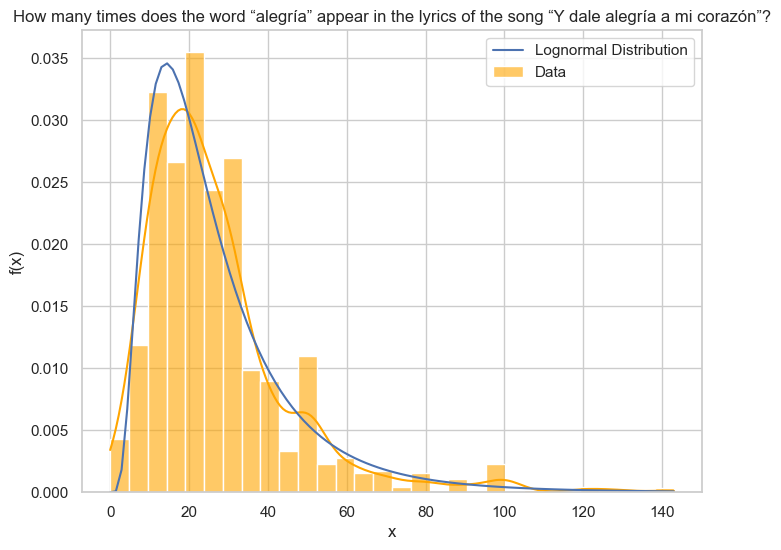

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(alegria, kde=True, stat='density', bins=30, color='orange', alpha=0.6 , label='Data')

# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(alegria_positive, floc=0)

# Superposición de curva lognormal
x = np.linspace(min(alegria), max(alegria), 100)
pdf_lognormal = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognormal, 'b-', label='Lognormal Distribution')

plt.title('How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/alegria_distribution_log.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Kolmogorov-Smirnov (log-normal)

In [67]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(alegria_positive, floc=0)

# Test Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(alegria_positive, 'lognorm', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Chequeo de hipótesis
alpha = 0.05
if ks_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_p_value * 0.02
min_alpha = ks_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ALEGRIA', ('KS-lognormal', 'Statistic')] = ks_stat
summary.loc['ALEGRIA', ('KS-lognormal', 'P-value')] = ks_p_value

Kolmogorov-Smirnov Test Statistic: 0.09039064699973476
P-value: 3.064021769476001e-10
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000031253022049


#### Test: Kolmogorov-Smirnov (gamma)

In [68]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.gamma.fit(alegria_positive, floc=0)

# Ejecución test Kolmogorov-Smirnov
ks_g_stat, ks_g_p_value = stats.kstest(alegria_positive, 'gamma', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic (gamma): {ks_g_stat}")
print(f"P-value: {ks_g_p_value}")

# Prueba de hipótesis
alpha = 0.05
if ks_g_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_g_p_value * 0.02
min_alpha = ks_g_p_value + eps
print(f"Minimum value of alpha: {min_alpha}")

summary.loc['ALEGRIA', ('KS-gamma', 'Statistic')] = ks_g_stat
summary.loc['ALEGRIA', ('KS-gamma', 'P-value')] = ks_g_p_value

Kolmogorov-Smirnov Test Statistic (gamma): 0.09185038535290702
P-value: 1.4674326873041677e-10
Reject the null hypothesis (H0)
Minimum value of alpha: 1.496781341050251e-10


### Transformación log -> normal

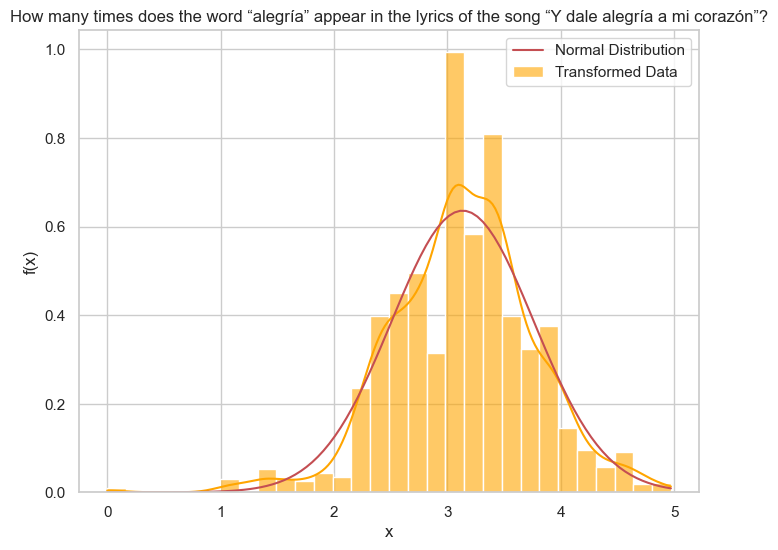

In [69]:
transformed_data = np.log1p(alegria)

plt.figure(figsize=(8, 6))
sns.histplot(transformed_data, kde=True, stat='density', bins=30, color='orange', alpha=0.6 , label='Transformed Data')

mean, std = np.mean(transformed_data), np.std(transformed_data)

# Superposición de curva normal
x = np.linspace(min(transformed_data), max(transformed_data), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')

plt.title('How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/alegria_distribution_normal.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
shapiro_stat, shapiro_p_value = stats.shapiro(transformed_data)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p_value}")

# Chequeo de hipoótesis
alpha = 0.05
if shapiro_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = shapiro_p_value * 0.02
min_alpha = shapiro_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ALEGRIA', ('Shapiro-Wilk', 'Statistic')] = shapiro_stat
summary.loc['ALEGRIA', ('Shapiro-Wilk', 'P-value')] = shapiro_p_value

Shapiro-Wilk Test Statistic: 0.9833033084869385
P-value: 1.5691378751903073e-11
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000001600520633


In [71]:
lilliefors_stat, lilliefors_pvalue = lilliefors(transformed_data)

print(f"Lilliefors Test Statistic: {lilliefors_stat}")
print(f"P-value: {lilliefors_pvalue}")

# Chequeo de hipoótesis
alpha = 0.05
if lilliefors_pvalue > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = lilliefors_pvalue * 0.02
min_alpha = lilliefors_pvalue + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ALEGRIA', ('Lilliefors', 'Statistic')] = lilliefors_stat
summary.loc['ALEGRIA', ('Lilliefors', 'P-value')] = lilliefors_pvalue

Lilliefors Test Statistic: 0.0858560665099129
P-value: 0.0009999999999998899
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00101999999999988775


In [72]:
summary

KS-lognormal            KS-gamma           Shapiro-Wilk          \
           Statistic   P-value Statistic   P-value    Statistic P-value   
GOALS       0.041311  0.017028  0.068591  0.000004     0.983942     0.0   
ALEGRIA     0.090391       0.0   0.09185       0.0     0.983303     0.0   

        Lilliefors          
         Statistic P-value  
GOALS     0.039948   0.001  
ALEGRIA   0.085856   0.001

## What is the sum of all numbers in a roulette wheel?

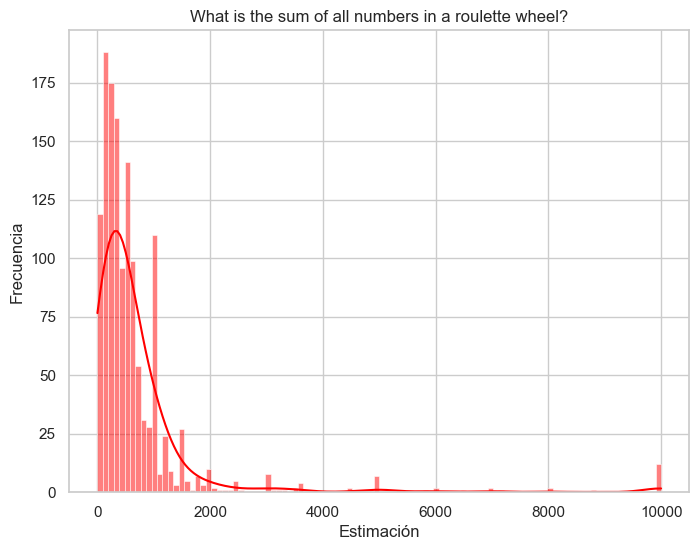

Mean: 712.3995584988962
Standard Deviation: 1246.1763405311438


In [73]:
plt.figure(figsize=(8, 6))
sns.histplot(roullette, kde=True, color = 'red')
plt.title('What is the sum of all numbers in a roulette wheel?')
plt.xlabel('Estimación')
plt.ylabel('Frecuencia')
plt.show()

mean = np.mean(roullette)
std = np.std(roullette)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

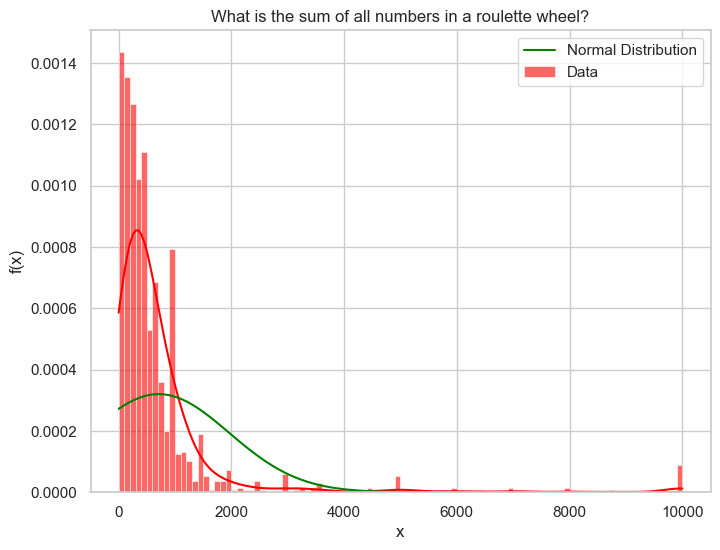

In [74]:
plt.figure(figsize=(8, 6))
sns.histplot(roullette, kde=True, stat='density', bins=100, color='red', alpha=0.6, label='Data')

mean, std = np.mean(roullette), np.std(roullette)

# Superposición de curva normal
x = np.linspace(min(roullette), max(roullette), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'green', label='Normal Distribution')

plt.title('What is the sum of all numbers in a roulette wheel?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

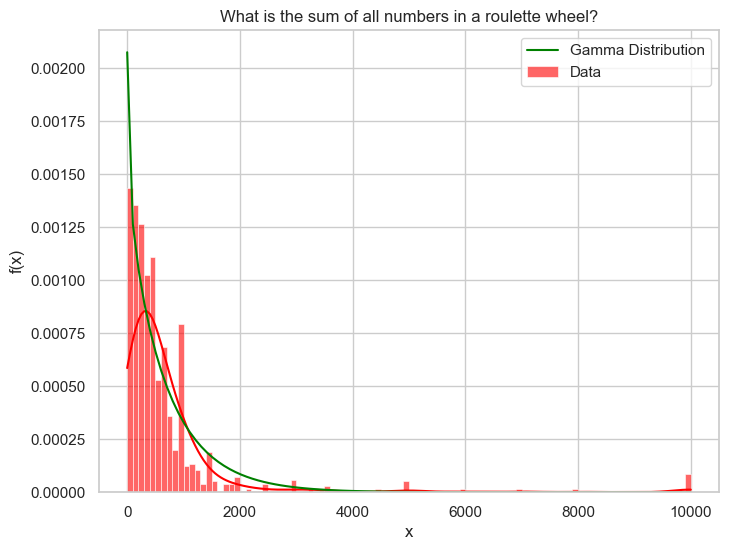

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(roullette, kde=True, stat='density', bins=100, color='red', alpha=0.6, label='Data')

# Estimación de la distribución gamma
shape, loc, scale = stats.gamma.fit(roullette, floc=0)

# Superposición de curva normal
x = np.linspace(min(roullette), max(roullette), 100)
pdf_gamma = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_gamma, 'green', label='Gamma Distribution')

plt.title('What is the sum of all numbers in a roulette wheel?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/roullette_distribution_gamma.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

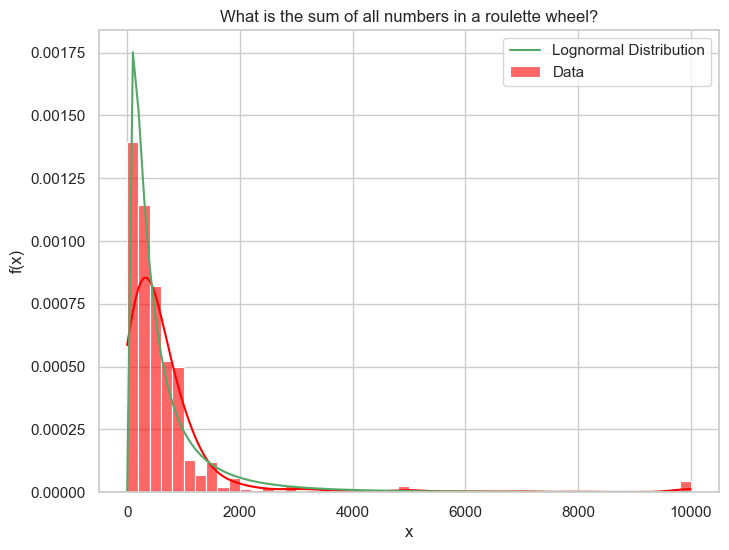

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(roullette, kde=True, stat='density', bins=50, color='red', alpha=0.6 , label='Data')

# Fit a lognormal distribution to the data
shape, loc, scale = stats.lognorm.fit(roullette, floc=0)

# Overlay Lognormal distribution
x = np.linspace(min(roullette), max(roullette), 100)
pdf_lognormal = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognormal, 'g-', label='Lognormal Distribution')

plt.title('What is the sum of all numbers in a roulette wheel?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/roullette_distribution_log.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Kolmogorov-Smirnov (log-normal)

In [77]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(roullette, floc=0)

ks_stat, ks_p_value = stats.kstest(roullette, 'lognorm', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Chqueo de hipótesis
alpha = 0.05
if ks_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_p_value * 0.02
min_alpha = ks_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ROULLETTE', ('KS-lognormal', 'Statistic')] = ks_stat
summary.loc['ROULLETTE', ('KS-lognormal', 'P-value')] = ks_p_value

Kolmogorov-Smirnov Test Statistic: 0.06519196094184443
P-value: 1.825835035738661e-05
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00001862351736453434


#### Test: Kolmogorov-Smirnov (gamma)

In [78]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.gamma.fit(roullette, floc=0)

ks_g_stat, ks_g_p_value = stats.kstest(roullette, 'gamma', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_g_stat}")
print(f"P-value: {ks_g_p_value}")

# Chqueo de hipótesis
alpha = 0.05
if ks_g_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_g_p_value * 0.02
min_alpha = ks_g_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ROULLETTE', ('KS-gamma', 'Statistic')] = ks_g_stat
summary.loc['ROULLETTE', ('KS-gamma', 'P-value')] = ks_g_p_value

Kolmogorov-Smirnov Test Statistic: 0.12149035425627652
P-value: 6.1402933699190674e-18
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000000000000626


### Transformación log -> normal

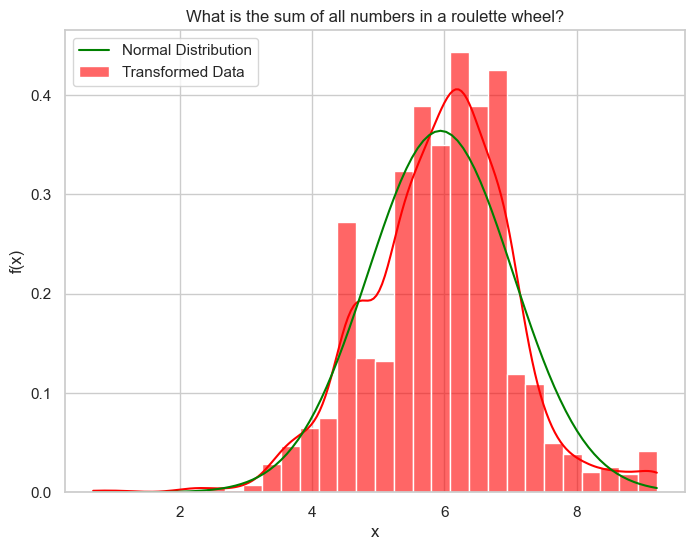

In [79]:
# Aplicar transformación logarítmica
transformed_data = np.log1p(roullette)

plt.figure(figsize=(8, 6))
sns.histplot(transformed_data, kde=True, stat='density', bins=30, color='red', alpha=0.6 , label='Transformed Data')

mean, std = np.mean(transformed_data), np.std(transformed_data)

# Superposición de curva normal
x = np.linspace(min(transformed_data), max(transformed_data), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'green', label='Normal Distribution')

plt.title('What is the sum of all numbers in a roulette wheel?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/roullette_distribution_normal.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Shapiro-Wilk (Normal)

In [80]:
shapiro_stat, shapiro_p_value = stats.shapiro(transformed_data)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p_value}")

# Chequeo de hipoótesis
alpha = 0.05
if shapiro_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = shapiro_p_value * 0.02
min_alpha = shapiro_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ROULLETTE', ('Shapiro-Wilk', 'Statistic')] = shapiro_stat
summary.loc['ROULLETTE', ('Shapiro-Wilk', 'P-value')] = shapiro_p_value

Shapiro-Wilk Test Statistic: 0.9835315346717834
P-value: 2.545114813345961e-11
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000002596017110


#### Test: Lilliefors (Normal)

In [81]:
from statsmodels.stats.diagnostic import lilliefors

lilliefors_stat, lilliefors_pvalue = lilliefors(transformed_data)

print(f"Lilliefors Test Statistic: {lilliefors_stat}")
print(f"P-value: {lilliefors_pvalue}")

# Chequeo de hipoótesis
alpha = 0.05
if lilliefors_pvalue > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = lilliefors_pvalue * 0.02
min_alpha = lilliefors_pvalue + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ROULLETTE', ('Lilliefors', 'Statistic')] = lilliefors_stat
summary.loc['ROULLETTE', ('Lilliefors', 'P-value')] = lilliefors_pvalue

Lilliefors Test Statistic: 0.06436055739336022
P-value: 0.0009999999999998899
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00101999999999988775


In [82]:
summary

KS-lognormal            KS-gamma           Shapiro-Wilk          \
             Statistic   P-value Statistic   P-value    Statistic P-value   
GOALS         0.041311  0.017028  0.068591  0.000004     0.983942     0.0   
ALEGRIA       0.090391       0.0   0.09185       0.0     0.983303     0.0   
ROULLETTE     0.065192  0.000018   0.12149       0.0     0.983532     0.0   

          Lilliefors          
           Statistic P-value  
GOALS       0.039948   0.001  
ALEGRIA     0.085856   0.001  
ROULLETTE   0.064361   0.001

## How much did a barrel of oil cost in 1970 (in US dollars cents)?

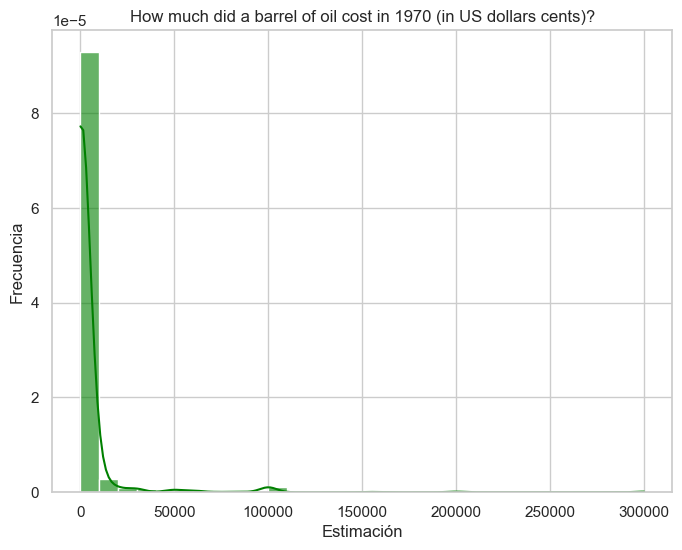

Mean: 4154.071126126127
Standard Deviation: 19353.25275384711


In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(oil_barrel, kde=True, stat='density', bins=30, color='green', alpha=0.6)
plt.title('How much did a barrel of oil cost in 1970 (in US dollars cents)?')
plt.xlabel('Estimación')
plt.ylabel('Frecuencia')
plt.show()

mean = np.mean(oil_barrel)
std = np.std(oil_barrel)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

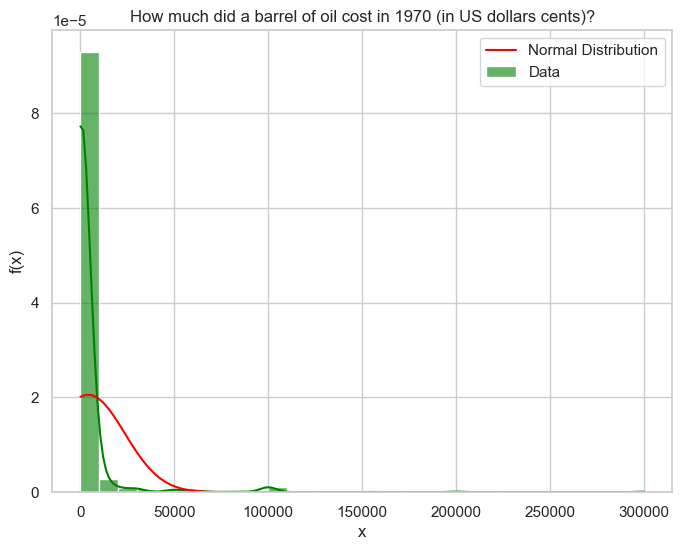

In [84]:
plt.figure(figsize=(8, 6))
sns.histplot(oil_barrel, kde=True, stat='density', bins=30, color='green', alpha=0.6, label='Data')

mean, std = np.mean(oil_barrel), np.std(oil_barrel)

# Superposición de curva normal
x = np.linspace(min(oil_barrel), max(oil_barrel), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'red', label='Normal Distribution')

plt.title('How much did a barrel of oil cost in 1970 (in US dollars cents)?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

In [85]:
oil_negative = oil_barrel[oil_barrel <= 0] #165 y 330
print(oil_negative)

# Solo positivos
eps = 1e-10
oil_positive = oil_barrel + eps

155    0.0
314    0.0
Name: 3, dtype: float64


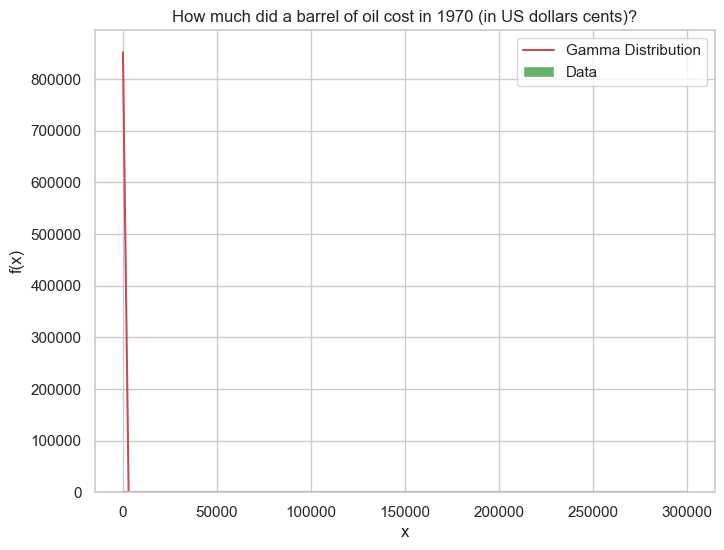

In [86]:
plt.figure(figsize=(8, 6))
sns.histplot(oil_positive, kde=True, stat='density', bins=30, color='green', alpha=0.6 , label='Data')

# Estimación de la distribución gamma
shape, loc, scale = stats.gamma.fit(oil_positive, floc=0)

# Superposición de curva normal
x = np.linspace(min(oil_positive), max(oil_positive), 100)
pdf_gamma = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_gamma, 'r-', label='Gamma Distribution')

plt.title('How much did a barrel of oil cost in 1970 (in US dollars cents)?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/oil_distribution_gamma.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

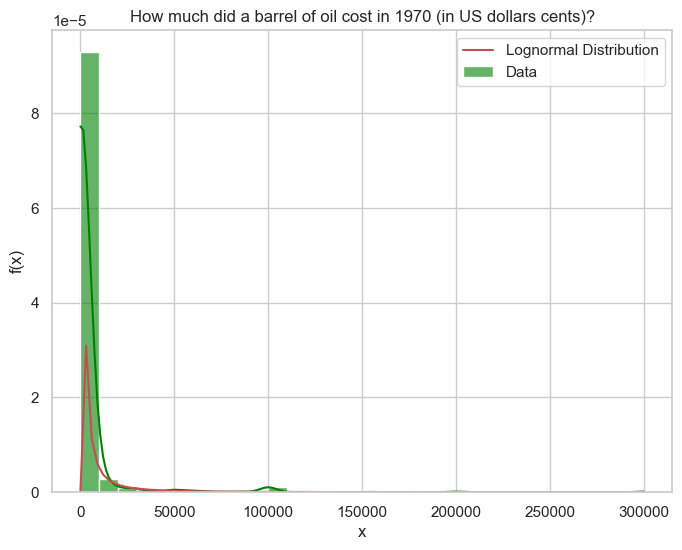

In [87]:
plt.figure(figsize=(8, 6))
sns.histplot(oil_barrel, kde=True, stat='density', bins=30, color='green', alpha=0.6 , label='Data')

# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(oil_positive, floc=0)

# Superposición de curva lognormal
x = np.linspace(min(oil_barrel), max(oil_barrel), 100)
pdf_lognormal = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognormal, 'r-', label='Lognormal Distribution')

plt.title('How much did a barrel of oil cost in 1970 (in US dollars cents)?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/oil_distribution_log.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [88]:
from scipy.integrate import quad

# Integrate the PDF of the lognormal distribution over the range
area, _ = quad(lambda x: stats.lognorm.pdf(x, shape, loc, scale), min(oil_barrel), max(oil_barrel))

print(f"Area under the lognormal PDF: {area}")


Area under the lognormal PDF: 0.9980625159977052


#### Test: Kolmogorov-Smirnov (log-normal)

In [89]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(oil_positive, floc=0)

ks_stat, ks_p_value = stats.kstest(oil_positive, 'lognorm', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Chqueo de hipótesis
alpha = 0.05
if ks_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_p_value * 0.02
min_alpha = ks_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['OIL_BARREL', ('KS-lognormal', 'Statistic')] = ks_stat
summary.loc['OIL_BARREL', ('KS-lognormal', 'P-value')] = ks_p_value

Kolmogorov-Smirnov Test Statistic: 0.09190930571034472
P-value: 3.0503050373675506e-10
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000031113111381


#### Test: Kolmogorov-Smirnov (gamma)

In [90]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.gamma.fit(oil_positive, floc=0)

ks_g_stat, ks_g_p_value = stats.kstest(oil_positive, 'gamma', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_g_stat}")
print(f"P-value: {ks_g_p_value}")

# Chqueo de hipótesis
alpha = 0.05
if ks_g_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_g_p_value * 0.02
min_alpha = ks_g_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['OIL_BARREL', ('KS-gamma', 'Statistic')] = ks_g_stat
summary.loc['OIL_BARREL', ('KS-gamma', 'P-value')] = ks_g_p_value

Kolmogorov-Smirnov Test Statistic: 0.24728572771666535
P-value: 3.145779094394662e-72
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000000000000000


### Transformación log -> normal

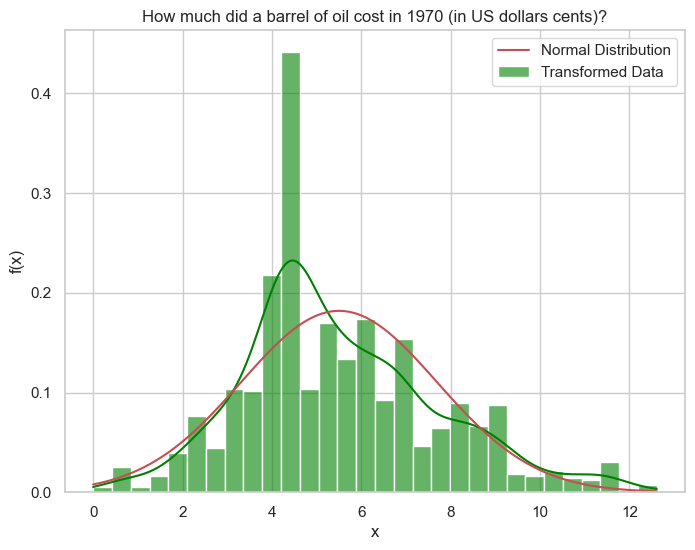

In [91]:
# Aplicar transformación logarítmica
transformed_data = np.log1p(oil_barrel)

plt.figure(figsize=(8, 6))
sns.histplot(transformed_data, kde=True, stat='density', bins=30, color='green', alpha=0.6 , label='Transformed Data')

mean, std = np.mean(transformed_data), np.std(transformed_data)

# Superposición de curva normal
x = np.linspace(min(transformed_data), max(transformed_data), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')

plt.title('How much did a barrel of oil cost in 1970 (in US dollars cents)?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/oil_distribution_normal.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Shapiro-Wilk (Normal)

In [92]:
shapiro_stat, shapiro_p_value = stats.shapiro(transformed_data)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p_value}")

# Chequeo de hipoótesis
alpha = 0.05
if shapiro_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = shapiro_p_value * 0.02
min_alpha = shapiro_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['OIL_BARREL', ('Shapiro-Wilk', 'Statistic')] = shapiro_stat
summary.loc['OIL_BARREL', ('Shapiro-Wilk', 'P-value')] = shapiro_p_value

Shapiro-Wilk Test Statistic: 0.9730969667434692
P-value: 4.7153477140699646e-15
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000000000480965


#### Test: Lilliefors (Normal)

In [93]:
from statsmodels.stats.diagnostic import lilliefors

lilliefors_stat, lilliefors_pvalue = lilliefors(transformed_data)

print(f"Lilliefors Test Statistic: {lilliefors_stat}")
print(f"P-value: {lilliefors_pvalue}")

# Chequeo de hipoótesis
alpha = 0.05
if lilliefors_pvalue > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = lilliefors_pvalue * 0.02
min_alpha = lilliefors_pvalue + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['OIL_BARREL', ('Lilliefors', 'Statistic')] = lilliefors_stat
summary.loc['OIL_BARREL', ('Lilliefors', 'P-value')] = lilliefors_pvalue

Lilliefors Test Statistic: 0.1095928991404958
P-value: 0.0009999999999998899
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00101999999999988775


In [94]:
summary

KS-lognormal            KS-gamma           Shapiro-Wilk          \
              Statistic   P-value Statistic   P-value    Statistic P-value   
GOALS          0.041311  0.017028  0.068591  0.000004     0.983942     0.0   
ALEGRIA        0.090391       0.0   0.09185       0.0     0.983303     0.0   
ROULLETTE      0.065192  0.000018   0.12149       0.0     0.983532     0.0   
OIL_BARREL     0.091909       0.0  0.247286       0.0     0.973097     0.0   

           Lilliefors          
            Statistic P-value  
GOALS        0.039948   0.001  
ALEGRIA      0.085856   0.001  
ROULLETTE    0.064361   0.001  
OIL_BARREL   0.109593   0.001

In [95]:
ks_lognormal_mean = summary[('KS-lognormal', 'Statistic')].mean()
ks_gamma_mean = summary[('KS-gamma', 'Statistic')].mean()
shapiro_wilk_mean = summary[('Shapiro-Wilk', 'Statistic')].mean()

print(f"KS-lognormal Mean: {ks_lognormal_mean}")
print(f"KS-gamma Mean: {ks_gamma_mean}")
print(f"Shapiro-Wilk Mean: {shapiro_wilk_mean}")

KS-lognormal Mean: 0.07220066250076172
KS-gamma Mean: 0.13230434729150875
Shapiro-Wilk Mean: 0.9809683561325073
